# Libraries

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from pathlib import Path

In [3]:
# Set the font family for math symbols
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Paths

In [ ]:
home_path = Path.home()
base      = home_path / 'base'
data_path = base / 'data'

ml_data_path   = data_path / 'ML'
ppv_data_path  = ml_data_path / 'ppv'

train_data_path = ml_data_path / 'train'

checkpoint_path = train_data_path / 'checkpoint'
training_process_path = train_data_path / 'training_process'

# GPU or CPU

In [7]:
# GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

device:  cpu


In [8]:
torch.cuda.device_count()

0

# Ctrans 101to256

In [ ]:
ct_101to256_path = training_process_path / 'c101_ctrans_101to256'

pe_list  = ['original_vector',  'index_concate',  'index_add',  'sin_concate',  'sin_add', 'poly_concate', 'learnable_PEV']
pev_list = ['Original', 'Concat Index', 'Add Index', 'Concat Sinusoidal', 'Add Sinusoidal', 'Concat Polynomial', 'Learnable']
npe = len(pe_list)

file_list  = [ct_101to256_path / (x + '_101c256.csv') for x in pe_list]
npe = len(file_list)
file_list

In [10]:
valid_mean_mse_arr = np.zeros(npe)
valid_std_mse_arr = np.zeros(npe)

test_mean_mse_arr = np.zeros(npe)
test_std_mse_arr = np.zeros(npe)

valid_mean_mse_arr_list = []
test_mean_mse_arr_list1  = []

for (i, csvfile) in enumerate(file_list):
  df = pd.read_csv(csvfile)

  valid_mse_values = np.sqrt(df.valid_err.values)
  test_mse_values  = np.sqrt(df.test_err.values)

  valid_mean_mse_arr_list.append(valid_mse_values)
  test_mean_mse_arr_list1.append(test_mse_values)

  valid_mean_mse = np.median(valid_mse_values)
  valid_std_mse  = valid_mse_values.std()

  test_mean_mse  = np.median(test_mse_values)
  test_std_mse   = test_mse_values.std()

  valid_mean_mse_arr[i] = valid_mean_mse
  valid_std_mse_arr[i] = valid_std_mse

  test_mean_mse_arr[i] = test_mean_mse
  test_std_mse_arr[i] = test_std_mse

In [12]:
for m,s,xi in zip(valid_mean_mse_arr, valid_std_mse_arr, pev_list):
  print(f"Valid MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Valid MSE: Mean=0.090996, std=0.005599  for Original
Valid MSE: Mean=0.085402, std=0.002808  for Concat Index
Valid MSE: Mean=0.086768, std=0.005145  for Add Index
Valid MSE: Mean=0.084751, std=0.003596  for Concat Sinusoidal
Valid MSE: Mean=0.088342, std=0.004120  for Add Sinusoidal
Valid MSE: Mean=0.089964, std=0.004709  for Concat Polynomial
Valid MSE: Mean=0.085111, std=0.005659  for Learnable


In [13]:
for m,s,xi in zip(test_mean_mse_arr, test_std_mse_arr, pev_list):
  print(f"Test MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Test MSE: Mean=0.087881, std=0.006378  for Original
Test MSE: Mean=0.085982, std=0.001411  for Concat Index
Test MSE: Mean=0.091859, std=0.003561  for Add Index
Test MSE: Mean=0.086253, std=0.003015  for Concat Sinusoidal
Test MSE: Mean=0.088931, std=0.005096  for Add Sinusoidal
Test MSE: Mean=0.089526, std=0.004163  for Concat Polynomial
Test MSE: Mean=0.083240, std=0.004562  for Learnable


# Ctrans 256to101 channels

In [ ]:
ct_256to101_path = training_process_path / 'c256_ctrans_256to101'

pe_list  = ['original_vector',  'index_concate',  'index_add',  'sin_concate',  'sin_add', 'poly_concate', 'learnable_PEV']
pev_list = ['Original', 'Concat Index', 'Add Index', 'Concat Sinusoidal', 'Add Sinusoidal', 'Concat Polynomial', 'Learnable']
npe = len(pe_list)

file_list  = [ct_256to101_path / ('ct_' + x + '_256c101.csv') for x in pe_list]
npe = len(file_list)
file_list

In [18]:
valid_mean_mse_arr = np.zeros(npe)
valid_std_mse_arr = np.zeros(npe)

test_mean_mse_arr = np.zeros(npe)
test_std_mse_arr = np.zeros(npe)

valid_mean_mse_arr_list = []
test_mean_mse_arr_list2  = []

for (i, csvfile) in enumerate(file_list):
  df = pd.read_csv(csvfile)

  valid_mse_values = np.sqrt(df.valid_err.values)
  test_mse_values  = np.sqrt(df.test_err.values)

  valid_mean_mse_arr_list.append(valid_mse_values)
  test_mean_mse_arr_list2.append(test_mse_values)

  valid_mean_mse = np.median(valid_mse_values)
  valid_std_mse  = valid_mse_values.std()

  test_mean_mse  = np.median(test_mse_values)
  test_std_mse   = test_mse_values.std()

  valid_mean_mse_arr[i] = valid_mean_mse
  valid_std_mse_arr[i] = valid_std_mse

  test_mean_mse_arr[i] = test_mean_mse
  test_std_mse_arr[i] = test_std_mse

In [20]:
for m,s,xi in zip(valid_mean_mse_arr, valid_std_mse_arr, pev_list):
  print(f"Valid MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Valid MSE: Mean=0.093458, std=0.005378  for Original
Valid MSE: Mean=0.090142, std=0.003612  for Concat Index
Valid MSE: Mean=0.092344, std=0.002360  for Add Index
Valid MSE: Mean=0.092078, std=0.002774  for Concat Sinusoidal
Valid MSE: Mean=0.090546, std=0.002420  for Add Sinusoidal
Valid MSE: Mean=0.091686, std=0.003188  for Concat Polynomial
Valid MSE: Mean=0.091474, std=0.002346  for Learnable


In [21]:
for m,s,xi in zip(test_mean_mse_arr, test_std_mse_arr, pev_list):
  print(f"Test MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Test MSE: Mean=0.090945, std=0.004154  for Original
Test MSE: Mean=0.089764, std=0.004292  for Concat Index
Test MSE: Mean=0.091499, std=0.004129  for Add Index
Test MSE: Mean=0.091961, std=0.003215  for Concat Sinusoidal
Test MSE: Mean=0.093113, std=0.004821  for Add Sinusoidal
Test MSE: Mean=0.091622, std=0.003117  for Concat Polynomial
Test MSE: Mean=0.089439, std=0.004748  for Learnable


# CNN-Trans (split) 256 channels

In [ ]:
ct256 = training_process_path / 'ct256_split'
ct256

In [ ]:
file_list  = [ct256 / (x + '_c256.csv') for x in pe_list]
file_list

In [25]:
valid_mean_mse_arr = np.zeros(npe)
valid_std_mse_arr = np.zeros(npe)

test_mean_mse_arr = np.zeros(npe)
test_std_mse_arr = np.zeros(npe)

valid_mean_mse_arr_list = []
test_mean_mse_arr_list3  = []

for (i, csvfile) in enumerate(file_list):
  df = pd.read_csv(csvfile)

  valid_mse_values = np.sqrt(df.valid_err.values)
  test_mse_values  = np.sqrt(df.test_err.values)

  valid_mean_mse_arr_list.append(valid_mse_values)
  test_mean_mse_arr_list3.append(test_mse_values)

  valid_mean_mse = np.median(valid_mse_values)
  valid_std_mse  = valid_mse_values.std()

  test_mean_mse  = np.median(test_mse_values)
  test_std_mse   = test_mse_values.std()

  valid_mean_mse_arr[i] = valid_mean_mse
  valid_std_mse_arr[i] = valid_std_mse

  test_mean_mse_arr[i] = test_mean_mse
  test_std_mse_arr[i] = test_std_mse

In [27]:
for m,s,xi in zip(valid_mean_mse_arr, valid_std_mse_arr, pev_list):
  print(f"Valid MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Valid MSE: Mean=0.079123, std=0.003948  for Original
Valid MSE: Mean=0.081039, std=0.002266  for Concat Index
Valid MSE: Mean=0.081243, std=0.003041  for Add Index
Valid MSE: Mean=0.079974, std=0.002756  for Concat Sinusoidal
Valid MSE: Mean=0.082258, std=0.003552  for Add Sinusoidal
Valid MSE: Mean=0.083377, std=0.003592  for Concat Polynomial
Valid MSE: Mean=0.077956, std=0.004192  for Learnable


In [28]:
for m,s,xi in zip(test_mean_mse_arr, test_std_mse_arr, pev_list):
  print(f"Test MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Test MSE: Mean=0.081222, std=0.002634  for Original
Test MSE: Mean=0.080295, std=0.004133  for Concat Index
Test MSE: Mean=0.081159, std=0.002884  for Add Index
Test MSE: Mean=0.078978, std=0.002956  for Concat Sinusoidal
Test MSE: Mean=0.082529, std=0.003142  for Add Sinusoidal
Test MSE: Mean=0.083178, std=0.003709  for Concat Polynomial
Test MSE: Mean=0.080291, std=0.004814  for Learnable


# CNN-Trans (split) 101 channels

In [ ]:
ct101 = training_process_path / 'ct101_split'
ct101

In [ ]:
file_list  = [ct101 / ('ct_' + x + '_c100.csv') for x in pe_list]
file_list

In [32]:
valid_mean_mse_arr = np.zeros(npe)
valid_std_mse_arr = np.zeros(npe)

test_mean_mse_arr = np.zeros(npe)
test_std_mse_arr = np.zeros(npe)

valid_mean_mse_arr_list = []
test_mean_mse_arr_list4  = []

for (i, csvfile) in enumerate(file_list):
  df = pd.read_csv(csvfile)

  valid_mse_values = np.sqrt(df.valid_err.values)
  test_mse_values  = np.sqrt(df.test_err.values)

  valid_mean_mse_arr_list.append(valid_mse_values)
  test_mean_mse_arr_list4.append(test_mse_values)

  valid_mean_mse = np.median(valid_mse_values)
  valid_std_mse  = valid_mse_values.std()

  test_mean_mse  = np.median(test_mse_values)
  test_std_mse   = test_mse_values.std()

  valid_mean_mse_arr[i] = valid_mean_mse
  valid_std_mse_arr[i] = valid_std_mse

  test_mean_mse_arr[i] = test_mean_mse
  test_std_mse_arr[i] = test_std_mse

In [34]:
for m,s,xi in zip(valid_mean_mse_arr, valid_std_mse_arr, pev_list):
  print(f"Valid MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Valid MSE: Mean=0.088120, std=0.002701  for Original
Valid MSE: Mean=0.089820, std=0.003531  for Concat Index
Valid MSE: Mean=0.087635, std=0.003428  for Add Index
Valid MSE: Mean=0.087223, std=0.002129  for Concat Sinusoidal
Valid MSE: Mean=0.089921, std=0.001528  for Add Sinusoidal
Valid MSE: Mean=0.089962, std=0.002577  for Concat Polynomial
Valid MSE: Mean=0.088887, std=0.002639  for Learnable


In [35]:
for m,s,xi in zip(test_mean_mse_arr, test_std_mse_arr, pev_list):
  print(f"Test MSE: Mean={m:.6f}, std={s:.6f}  for {xi}")

Test MSE: Mean=0.088369, std=0.002739  for Original
Test MSE: Mean=0.087714, std=0.003188  for Concat Index
Test MSE: Mean=0.087777, std=0.004423  for Add Index
Test MSE: Mean=0.091279, std=0.002966  for Concat Sinusoidal
Test MSE: Mean=0.087907, std=0.001960  for Add Sinusoidal
Test MSE: Mean=0.092177, std=0.002474  for Concat Polynomial
Test MSE: Mean=0.089186, std=0.001888  for Learnable


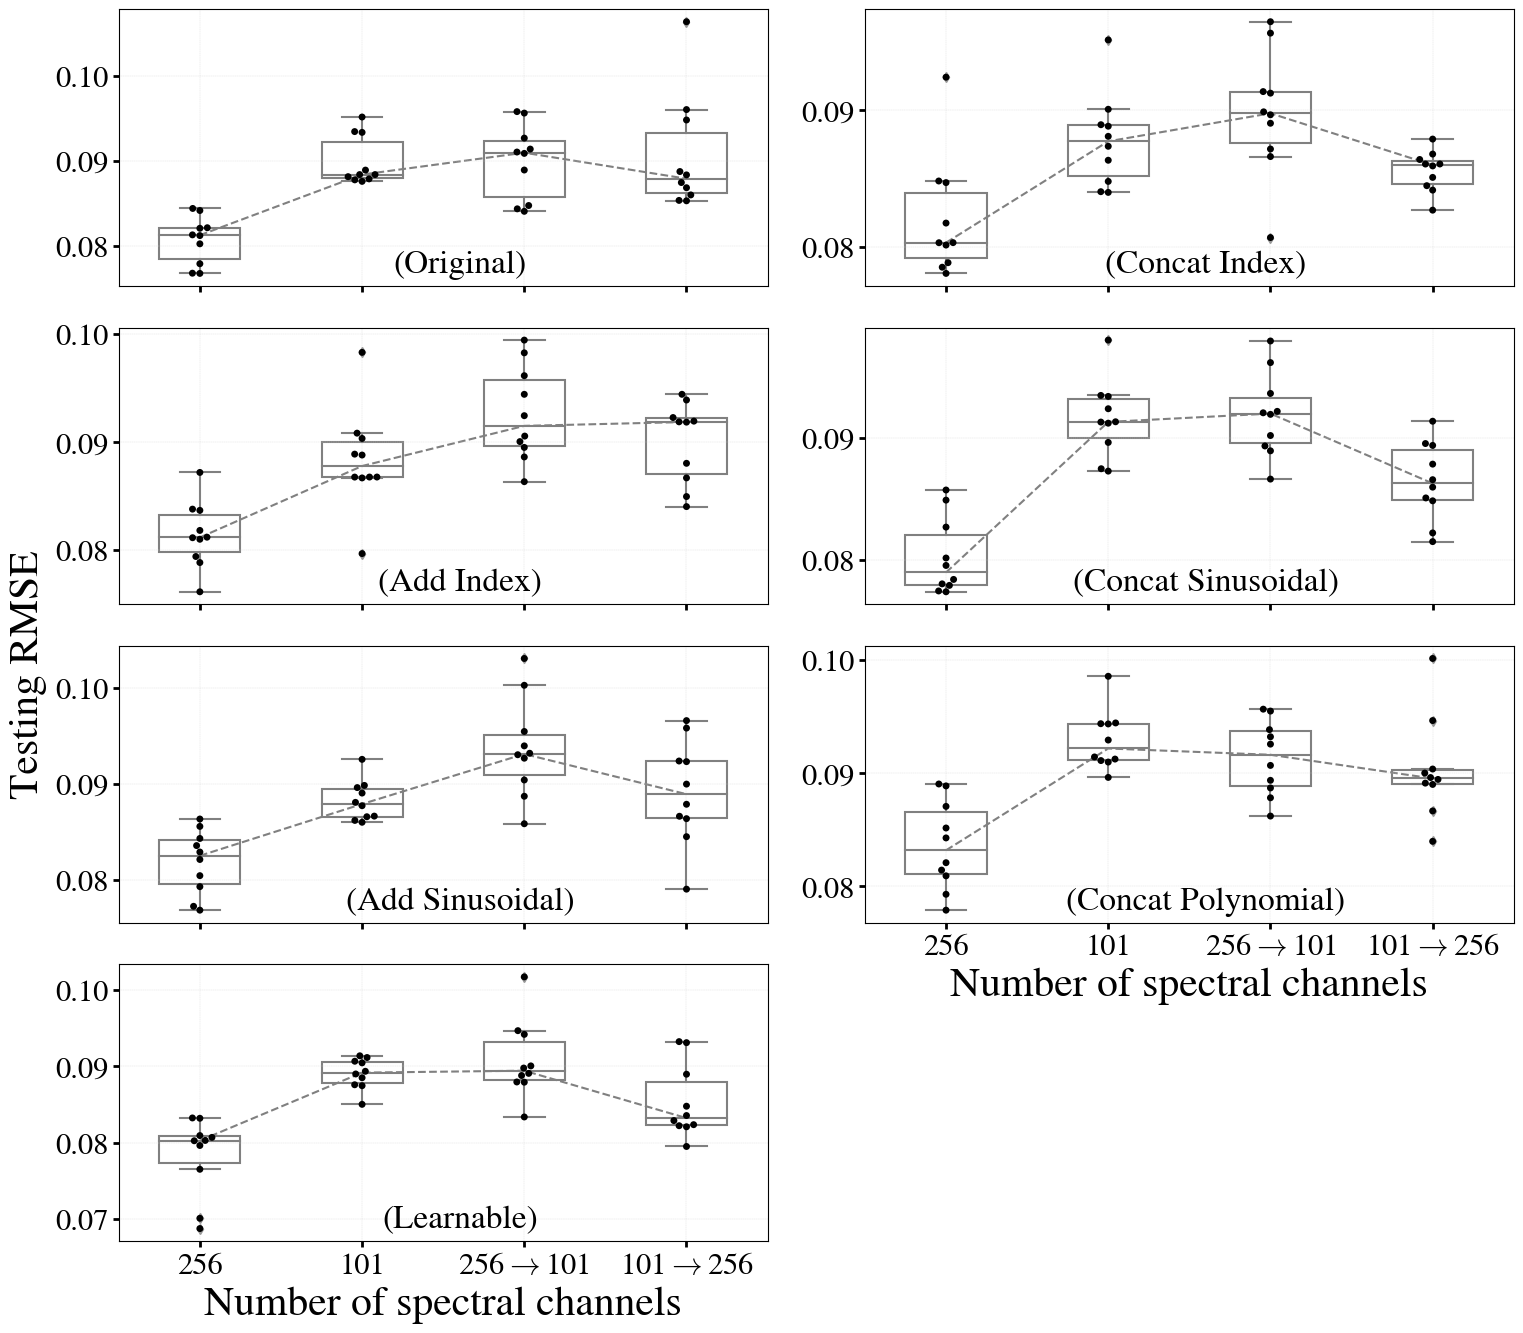

In [ ]:
# Set font
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"


fig, axs = plt.subplots(figsize=(18,16), nrows=4, ncols=2, sharex=False)
axs = axs.flatten()


PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'grey'},
    'medianprops':{'color':'grey'},
    'whiskerprops':{'color':'grey'},
    'capprops':{'color':'grey'}
}

x = [0, 1, 2, 3]

for kpe in range(npe):
    ax = axs[kpe]
    pev = pev_list[kpe]

    ylabel = 'Testing RMSE' if (kpe == 2) else ''
    xlabel = 'Number of spectral channels' if ((kpe == 5) or (kpe == 6)) else ''

    data = [test_mean_mse_arr_list3[kpe], test_mean_mse_arr_list4[kpe], test_mean_mse_arr_list2[kpe], test_mean_mse_arr_list1[kpe]]



    ploti, = ax.plot([], [], 'ko', label='(' + pev + ')')
    ploti.set_visible(True)

    sns.swarmplot(data=data, color='k', marker='o', ax=ax)
    sns.boxplot(data=data, width=0.5, color='white', ax=ax, **PROPS)
    ax.plot(x, [np.median(data[0]), np.median(data[1]), np.median(data[2]), np.median(data[3])], ls='--', color='gray', zorder=-1, label='')


    # ax.set_title(pev)
    ax.set_xlabel(xlabel, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=30, labelpad=0)
    ax.yaxis.set_label_coords(-0.11, -0.25)
    ax.tick_params(axis='both', which='both', length=6, width=1, labelsize=16)


    ax.tick_params(axis='x', labelsize=22, pad=4)
    ax.tick_params(axis='y', labelsize=22)
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=4)
    ax.tick_params(which='minor', length=2)


    if (kpe == 5) or (kpe == 6):
        ax.set_xticklabels(['256', '101', r'256$\rightarrow$101', r'101$\rightarrow$256'], rotation=0)
    else:
        ax.set_xticklabels(['', '', '', ''], rotation=0)


    ax.grid(True, linestyle='--', linewidth=0.25, color='lightgray', zorder=-10)
    leg = ax.legend(loc='lower center', fancybox=False, framealpha=0., labelcolor='k', fontsize=24, handletextpad=-1.0, borderaxespad=-0.2)
    [item.set_visible(False) for item in leg.legendHandles]


fig.delaxes(axs[-1])

# set the spacing between subplots
plt.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0.15,
                    hspace=0.15
                    )



plt.show()

# End